## Question 1: Implement the Harris Algorithm

In this task, we implement the Harris Corner Detection algorithm using OpenCV to detect corners in images. The algorithm works by calculating the image gradient, followed by computing the Harris corner response. Key steps include:

    Convert the image to grayscale: Harris corner detection requires grayscale images.
    Compute gradients: Gradients in the x and y directions are computed using Sobel operators.
    Compute Harris matrix: A matrix based on the gradients to determine the corner response.
    Apply thresholding: The corner response is thresholded to identify points with strong corner responses.
    Display results: The detected corners are highlighted and displayed on the original image.

Output: The output will be the original image with corners highlighted, indicating where strong corners are detected.

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('cameraman.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [27]:
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

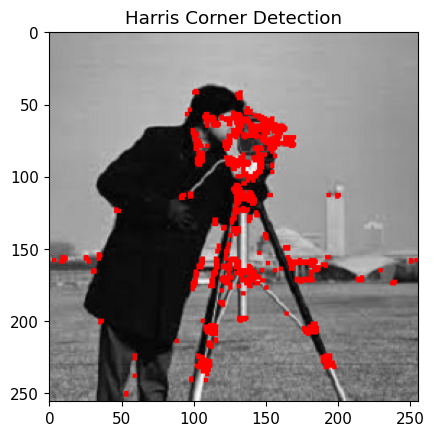

In [28]:
image[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.show()

## Question 2: Implement Image Pyramid

In this task, we create an Image Pyramid using OpenCV. An image pyramid is a series of images where each level is a down-sampled version of the previous one, used for multi-scale processing (such as object detection).

    Load the image: We begin by loading the image.
    Generate the image pyramid: Using OpenCV, we generate several levels of the pyramid by reducing the image size progressively.
    Display each pyramid level: Each pyramid level is displayed in sequence.

Output: The output will show multiple images, where each subsequent image in the sequence is a down-sampled version of the previous one.

In [29]:
image = cv2.imread('cameraman.jpg') 

layer = image.copy()
pyramid = [layer]
for i in range(3):  # Number of levels
    layer = cv2.pyrDown(layer)
    pyramid.append(layer)

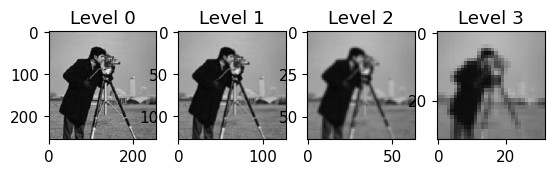

In [30]:
for i, img in enumerate(pyramid):
    plt.subplot(1, 4, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Level {i}")
plt.show()

## Question 3: Image Segmentation with Watershed Algorithm

In this task, we implement the Watershed Algorithm for segmenting objects in an image.

    Preprocess the image: Convert to grayscale, apply thresholding, and perform morphological operations.
    Apply the watershed algorithm: The algorithm is applied to segment the image into distinct regions.
    Display the segmented image: The segmented regions will be displayed with different colors.

Output: The output will show the segmented regions of the image, each region having a different color to indicate the segmentation.

In [31]:
image = cv2.imread('cameraman.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

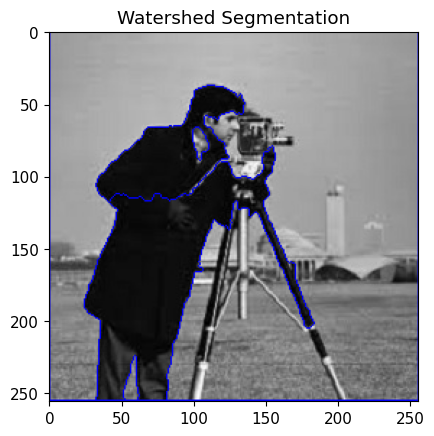

In [32]:
# Threshold the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Display result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.show()


### Implementing the SIFT Algorithm

In this task, we implement the SIFT (Scale-Invariant Feature Transform) algorithm to detect and describe keypoints in an image. The key steps are:

    Convert the image to grayscale: SIFT works on grayscale images to extract features.
    Detect keypoints and descriptors: Use the SIFT algorithm to detect keypoints and compute their descriptors.
    Draw keypoints on the image: Highlight the detected keypoints on the original image.

Output: The output will be the original image with keypoints highlighted, showing locations of interest in the image, which are scale-invariant.

In [ ]:
# SIFT Algorithm
image = cv2.imread('cameraman.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Drawing keypoints
result = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

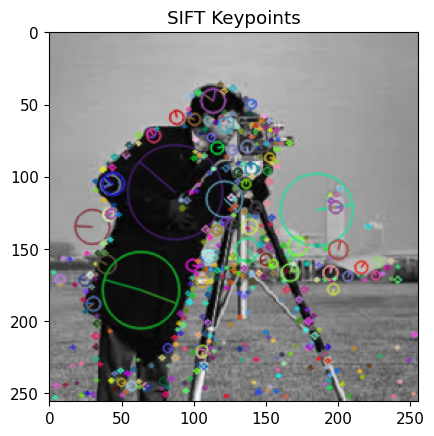

In [47]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.show()

### YOLO Object Detection

### Explanation of what we have done here:

We are using YOLOv5 (You Only Look Once) to perform real-time object detection. The steps are as follows:

    Loading the Model: The pre-trained YOLOv5 model is loaded using the torch.hub.load() function.
    Performing Inference: We provide input images, and YOLOv5 detects objects in these images.
    Rendering the Results: The bounding boxes, labels, and confidence scores are drawn on the images.
    Displaying the Results: We display the processed images in the notebook or save them as new files.

In [48]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Loading the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load COCO test images
images = ['cameraman.jpg', 'c.jpg', 'players.jpg','a.jpg','b.jpg']

# Perform inference
results = model(images)


Using cache found in C:\Users\Balddudehere/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-22 Python-3.12.4 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
C:\Users\Balddudehere/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [41]:
print(results)

image 1/5: 256x256 2 persons, 1 cell phone
image 2/5: 4000x6000 10 persons, 2 chairs
image 3/5: 363x544 4 persons, 1 sports ball
image 4/5: 4016x6016 4 vases
image 5/5: 4014x6032 1 bowl
Speed: 616.0ms pre-process, 749.4ms inference, 0.0ms NMS per image at shape (5, 3, 640, 640)


In [42]:
rendered_images = results.render()
print(type(rendered_images))
print(len(rendered_images)) 

<class 'list'>
5


In [43]:
%matplotlib inline

Processing Image 1


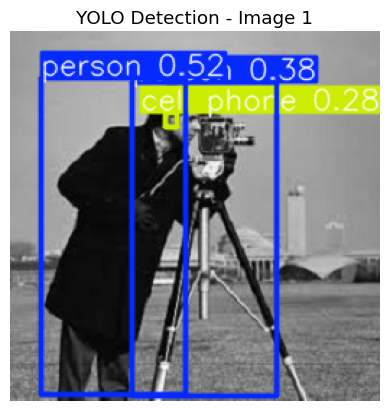

Processing Image 2


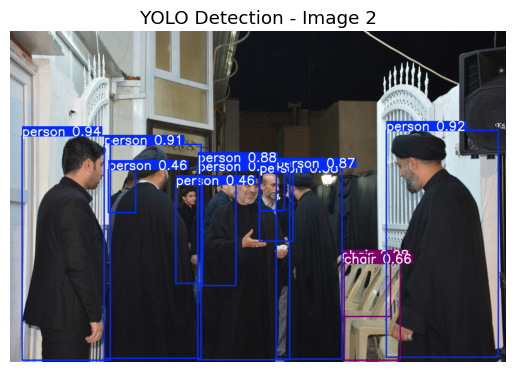

Processing Image 3


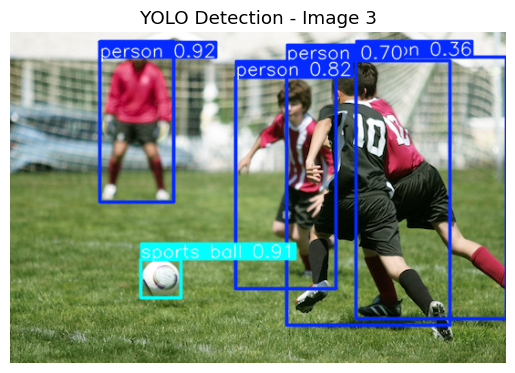

Processing Image 4


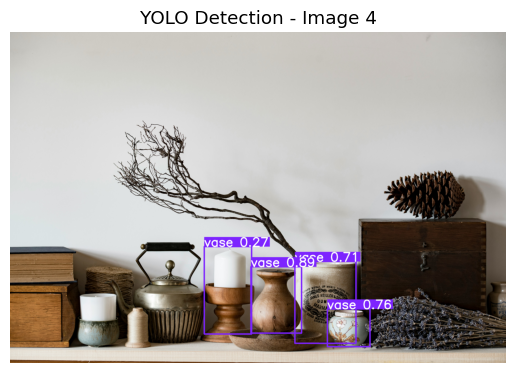

Processing Image 5


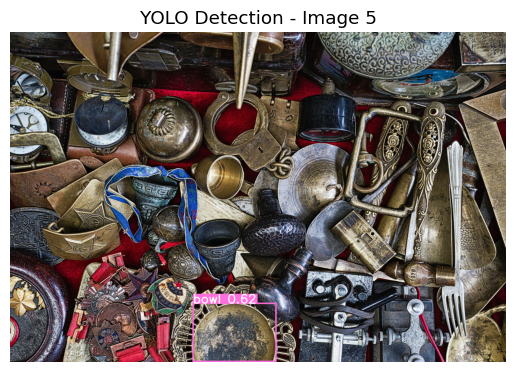

In [ ]:
for i, img in enumerate(results.render()):
    print(f"Processing Image {i+1}")
    img = Image.fromarray(img) 
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"YOLO Detection - Image {i + 1}")
    plt.show()